In [20]:
import numpy as np
from hdf5storage import loadmat, savemat 
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [21]:
outdict=loadmat('invmat')
invmat=outdict['invmat']

In [22]:
outdict=loadmat('leadfield_nn_rr')
outdict.keys()

dict_keys(['leadfield', 'source_nn', 'source_rr'])

In [23]:
leadfield=outdict['leadfield']

In [24]:
outdict=loadmat('../test_scripts/EEG_processing/DAON/icadata.mat')
mixedsig=outdict['mixedsig']*0.000001
Fs=outdict['Fs'][0]
badchan=outdict['badchan'][0]-1
goodchan=outdict['goodchan'][0]-1

In [25]:
source_data_restore=np.matmul(invmat,mixedsig)

In [26]:
EEG_recon=np.matmul(leadfield,source_data_restore)

In [27]:
outdict=loadmat('../test_scripts/EEG_processing/DAON/ch_bad.mat')
ch_bad=outdict['ch_bad'][0]-1
ch_bad=np.delete(ch_bad,48,0)

(-1000000.0, 1000000.0)

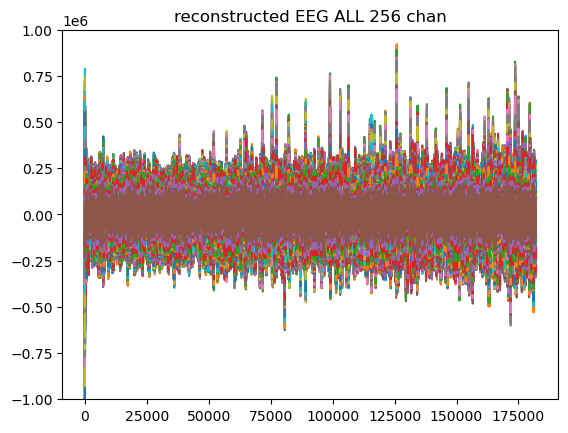

In [31]:
plt.plot(np.arange(0,np.shape(EEG_recon)[1],1),EEG_recon.transpose())
plt.title('reconstructed EEG ALL 256 chan')
plt.ylim([-1e6,1e6])
# 16 s

(-1000000.0, 1000000.0)

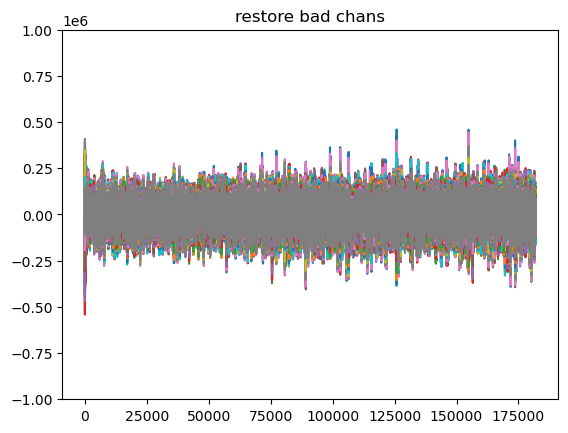

In [32]:
# restore bad chan
plt.plot(np.arange(0,np.shape(EEG_recon)[1],1),EEG_recon[ch_bad,:].transpose())
plt.title('restore bad chans')
plt.ylim([-1e6,1e6])
# 3 s


In [37]:
EEG_recon208=np.copy(EEG_recon)
EEG_recon208=np.delete(EEG_recon208,ch_bad,0)

In [ ]:
# from scipy.stats import pearsonr
# corr, _ = pearsonr(EEG_recon208, mixedsig)

In [39]:
corr = np.corrcoef(EEG_recon208, mixedsig, rowvar=True)

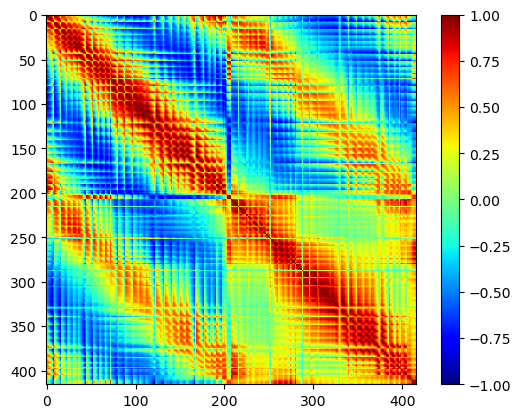

In [42]:
plt.imshow(corr,cmap='jet',vmin=-1,vmax=1)
plt.colorbar()


Text(0, 0.5, 'corrcoef')

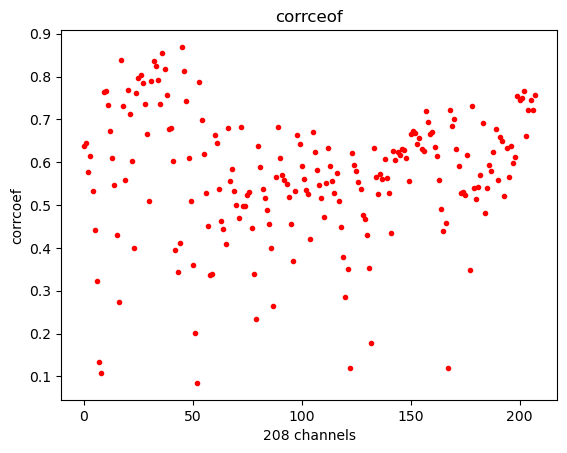

In [52]:
corrcoef208dg=np.zeros((208))
for i in range(208):
    corrcoef208dg[i]=corr[i,208+i]
plt.plot(corrcoef208dg,'r.')
plt.title('corrceof')
plt.xlabel('208 channels')
plt.ylabel('corrcoef')

In [62]:
sortedarray =np.sort(corrcoef208dg)
indices = np.argsort(corrcoef208dg)

In [63]:
indices

array([ 52,   8, 167, 122,   7, 132,  51,  79,  87,  16, 120,   6,  58,
        78,  59,  43, 177, 121, 131,  50,  96, 119,  42,  86,  23,  65,
        44, 104, 130,  15, 141, 165,   5,  64,  77, 118,  57,  85,  95,
       166,  63, 129,  71, 110, 128, 184,  84, 164,  74,  73,  70, 117,
        30,  49, 180, 109,  83,  94, 193, 175,  75, 103, 135,  56, 115,
       173, 140, 174,  76,  69,  97,   4, 102, 127,  62,  82, 185, 179,
       181, 108,  14,  93, 111, 126,  67, 149, 114, 163,  92, 190,  19,
       101, 137, 139,  88, 195, 134,  91, 182, 136, 116,   2, 187, 125,
       107,  68,  81, 172, 113, 100, 124, 186, 197,  22,  41, 143, 138,
       148,  13,  90,  48, 198, 162,   3, 145, 176,  55, 123, 188, 106,
       144, 142, 156, 147, 171, 146, 155, 112, 194, 133, 161,  80,   0,
       196,  99, 153,   1,  61, 192, 154, 191, 203,  98,  60, 159, 150,
        29, 152, 105, 160,  12, 151,  39, 189,  40,  66,  89,  72, 169,
       183, 158,  54, 170,  21, 157, 206, 204, 168,  18, 178,  1